In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# load dataset

In [4]:
data = pd.read_csv('customers.csv')

# preprocessing

In [6]:
# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1–100)']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

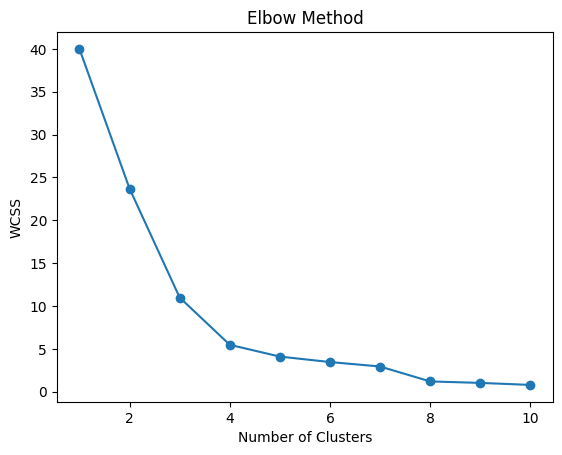

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Train KMeans and Predict

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Suppose 5 is best
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to dataset
data['Cluster'] = clusters

# Visulize Clusters

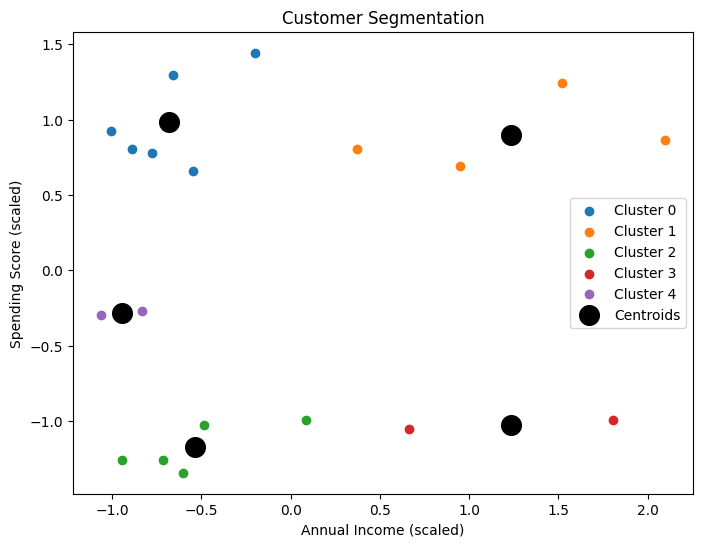

In [10]:
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()